**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary_v2"
)
txt_fname = "umap.cluster.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)
print(txt_fpath)
dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_umap_cluster = dat
print(dim(dat))
head(dat, 3)

[1] "/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary_v2/umap.cluster.tsv"
[1] 87610     4


Region,UMAP1,UMAP2,Cluster
<chr>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,-21.87767,-9.176196,39
chr1:16025-16338,-12.15321,-12.879920,20
chr1:115429-115969,-11.02704,-3.031374,0


In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "region_coverage_fcc", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "result.coverage.score.merge.fcc.atac.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_score_merge = dat
print(dim(dat))
head(dat, 3)

[1] 582546      9


Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


## Merge

In [4]:
dat = dplyr::inner_join(
    dat_region_score_merge,
    dat_region_umap_cluster,
    by = "Region"
)

print(dim(dat))
head(dat, 3)

[1] 359163     12


Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label,UMAP1,UMAP2,Cluster
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,-29.36876,9.278464,8
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,-29.47242,11.720701,2
chr11,4092109,4092511,chr11:4092109-4092511,-0.4462995,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,-17.29462,-1.826349,6


In [5]:
lst = split(dat, dat$Assay_Type)
vec = c("ASTARR", "WSTARR", "LMPRA", "TMPRA", "CRISPRi-Growth", "CRISPRi-HCRFF")

dat_region_merge_atac = lst[["ATAC"]]
lst_dat_region_merge_fcc = lst[vec]

In [6]:
dat = dat_region_merge_atac
head(dat, 3)

Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label,UMAP1,UMAP2,Cluster
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr1,10038,10405,chr1:10038-10405,3.940038,STARR_ATAC_K562_Reddy_KS91,ATAC,ASTARR_KS91,ATAC,-21.87767,-9.176196,39
chr1,16025,16338,chr1:16025-16338,3.830812,STARR_ATAC_K562_Reddy_KS91,ATAC,ASTARR_KS91,ATAC,-12.15321,-12.879920,20
chr1,115429,115969,chr1:115429-115969,15.096518,STARR_ATAC_K562_Reddy_KS91,ATAC,ASTARR_KS91,ATAC,-11.02704,-3.031374,0


In [7]:
lst = lst_dat_region_merge_fcc
names(lst)

[1] "ASTARR"         "WSTARR"         "LMPRA"          "TMPRA"         
[5] "CRISPRi-Growth" "CRISPRi-HCRFF"

## ATAC

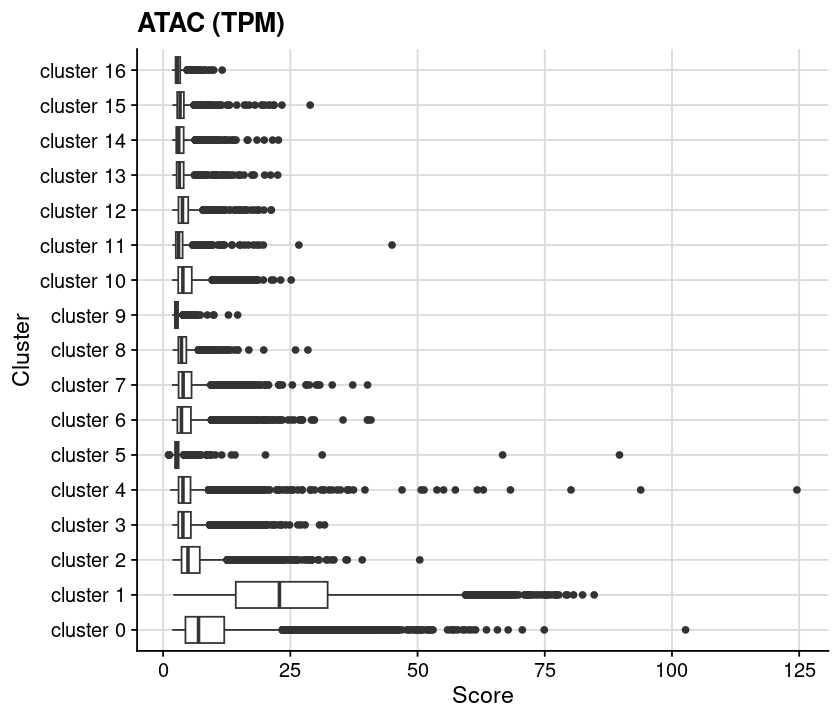

In [16]:
txt = "ATAC (TPM)"
dat = dat_region_merge_atac
dat = dat %>% 
    dplyr::filter(Cluster >= 0, Cluster <= 16) %>%
    dplyr::mutate(Cluster = paste("cluster", Cluster)) %>%
    dplyr::mutate(Cluster = factor(Cluster, levels=paste("cluster", 0:16)))

gpt = ggplot(dat, aes(x=Score, y=Cluster)) + 
    geom_boxplot() + 
    labs(title = txt) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height=6, repr.plot.width=7)
print(gpt)

## FCC

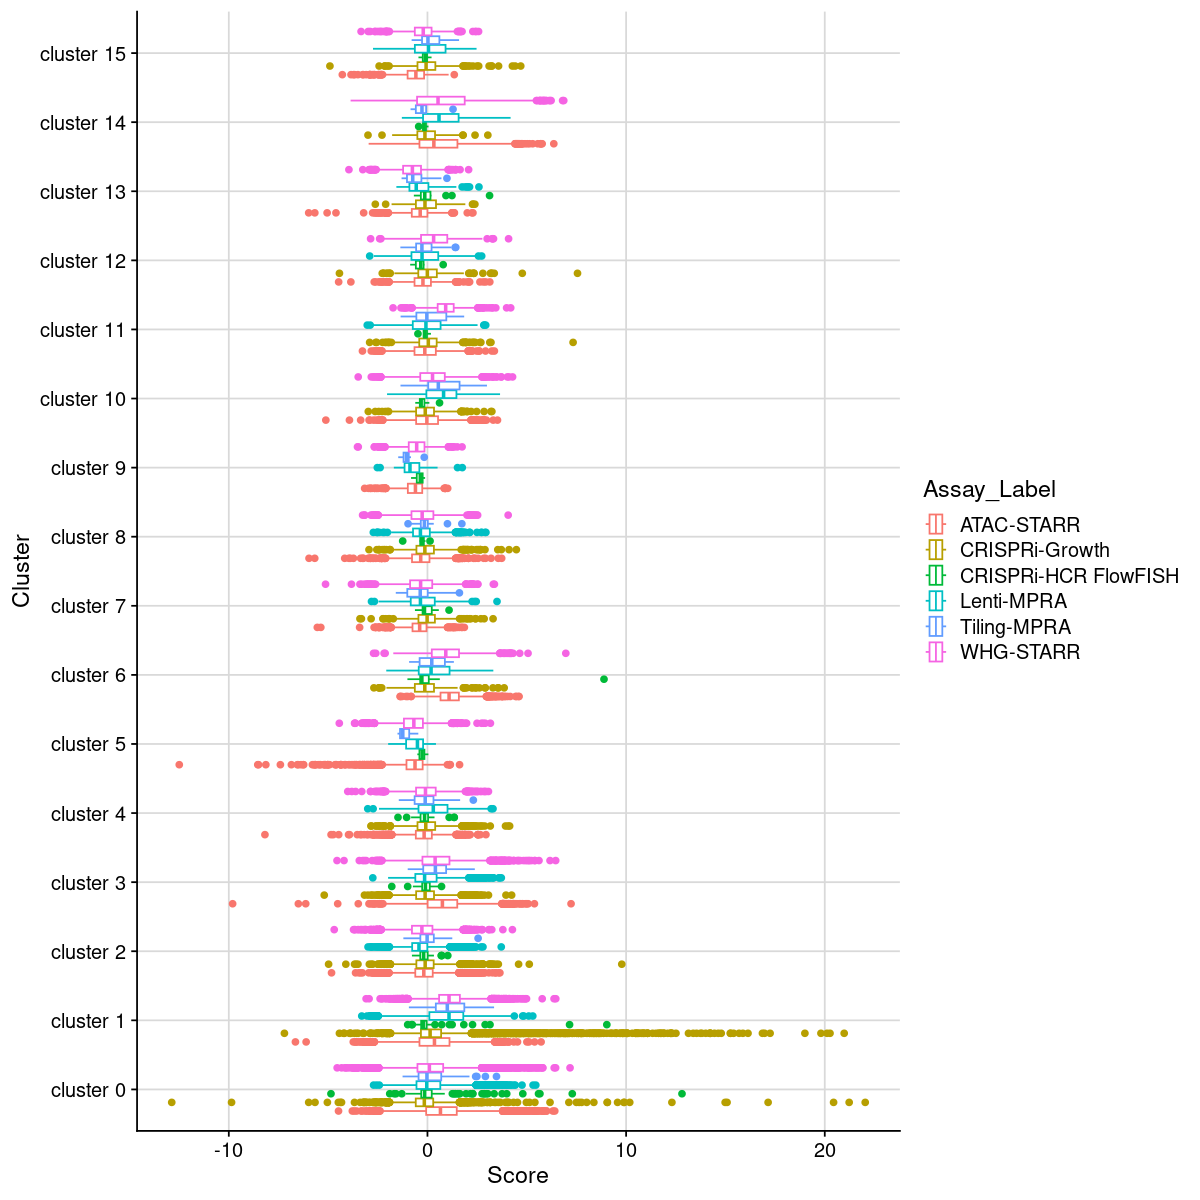

In [20]:
lst = lst_dat_region_merge_fcc
dat = bind_rows(lst)
dat = dat %>% 
    dplyr::filter(Cluster >= 0, Cluster <= 15) %>%
    dplyr::mutate(Cluster = paste("cluster", Cluster)) %>%
    dplyr::mutate(Cluster = factor(Cluster, levels=paste("cluster", 0:16)))

gpt = ggplot(dat, aes(x=Score, y=Cluster, color=Assay_Label)) + 
    geom_boxplot() + 
    theme_cowplot() +
    background_grid()

options(repr.plot.height=10, repr.plot.width=10)
print(gpt)

In [30]:
lst = lst_dat_region_merge_fcc
vec = names(lst)
names(vec) = vec

lst = lapply(vec, function(idx){
    
    dat = lst[[idx]] 
    dat = dat %>% 
        dplyr::filter(Cluster >= 0, Cluster <= 15) %>%
        dplyr::mutate(Cluster = paste("cluster", Cluster)) %>%
        dplyr::mutate(Cluster = factor(Cluster, levels=paste("cluster", 0:16)))

    txt_assay = unique(dat$Assay_Label)
    
    gpt = ggplot(dat, aes(x=Score, y=Cluster)) + 
        geom_boxplot() + 
        labs(title=txt_assay) +
        theme_cowplot() +
        background_grid()
    
    return(gpt)
})

lst_gpt = lst
print(names(lst))

[1] "ASTARR"         "WSTARR"         "LMPRA"          "TMPRA"         
[5] "CRISPRi-Growth" "CRISPRi-HCRFF" 


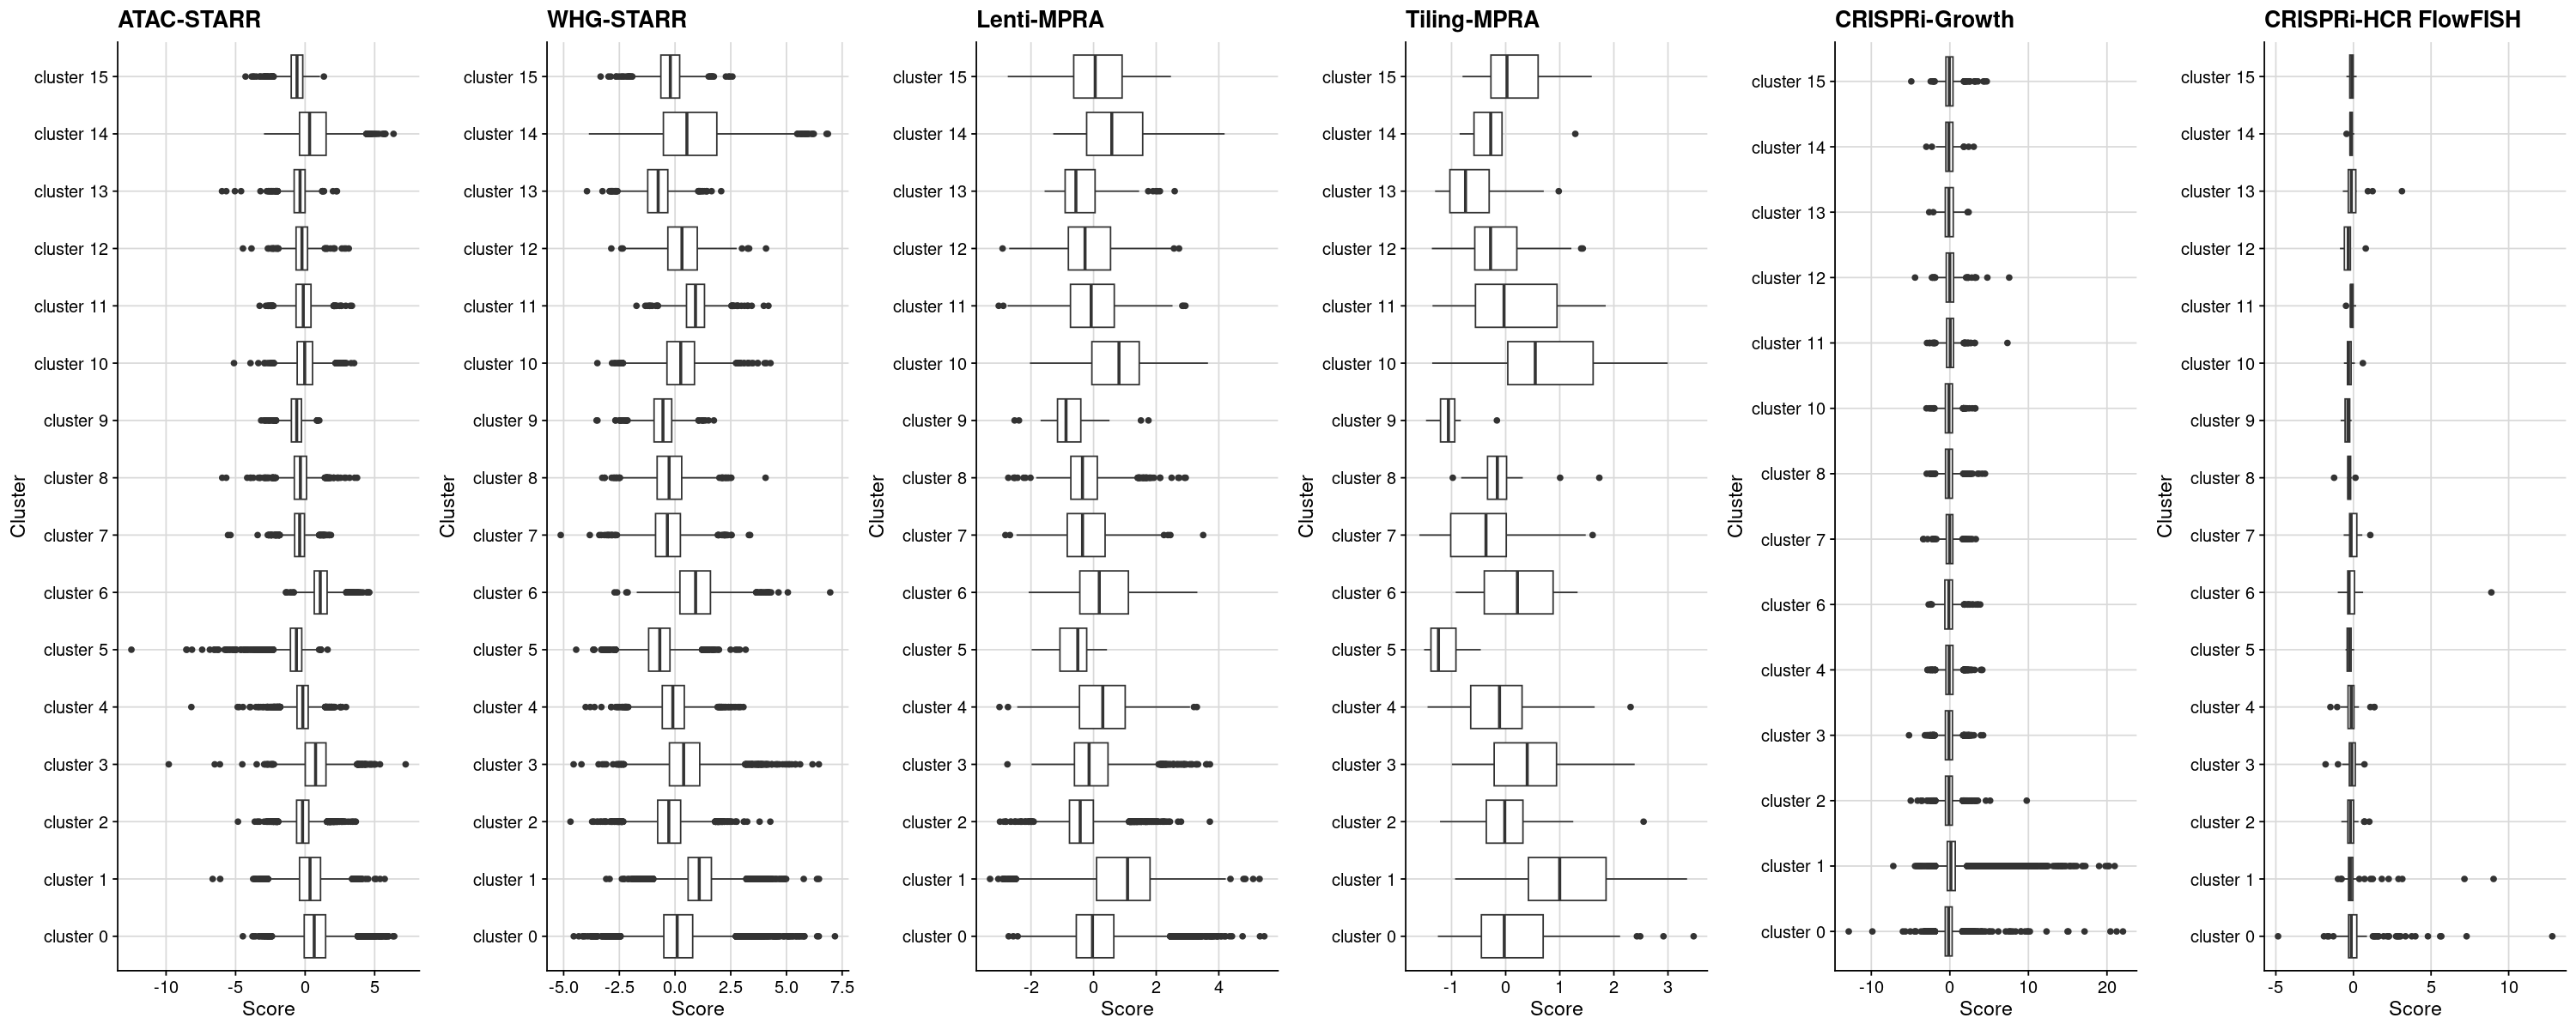

In [31]:
### options(repr.plot.height=10, repr.plot.width=25)
plot_grid(plotlist = lst_gpt, nrow=1, byrow=FALSE)

In [32]:
lst_params = list(
    "ASTARR" = list(x=-10, y=8),
    "WSTARR" = list(x=-8,  y=8),
    "LMPRA"  = list(x=-3,  y=5),
    "TMPRA"  = list(x=-2,  y=3),
    "CRISPRi-Growth" = list(x=-7, y=7),
    "CRISPRi-HCRFF"  = list(x=-3, y=3)
)

In [33]:
lst = lst_dat_region_merge_fcc
vec = names(lst)
names(vec) = vec

lst = lapply(vec, function(idx){
    
    dat = lst[[idx]] 
    dat = dat %>% 
        dplyr::filter(Cluster >= 0, Cluster <= 15) %>%
        dplyr::mutate(Cluster = paste("cluster", Cluster)) %>%
        dplyr::mutate(Cluster = factor(Cluster, levels=paste("cluster", 0:16)))

    txt_assay = unique(dat$Assay_Label)
    num_x     = lst_params[[idx]]$x
    num_y     = lst_params[[idx]]$y
    
    gpt = ggplot(dat, aes(x=Score, y=Cluster)) + 
        geom_boxplot() + 
        xlim(num_x, num_y) +
        labs(title=txt_assay) +
        theme_cowplot() +
        background_grid()
    
    return(gpt)
})

lst_gpt = lst
print(names(lst))

[1] "ASTARR"         "WSTARR"         "LMPRA"          "TMPRA"         
[5] "CRISPRi-Growth" "CRISPRi-HCRFF" 


Warning message:
“Removed 1 row containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 8 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 178 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 15 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


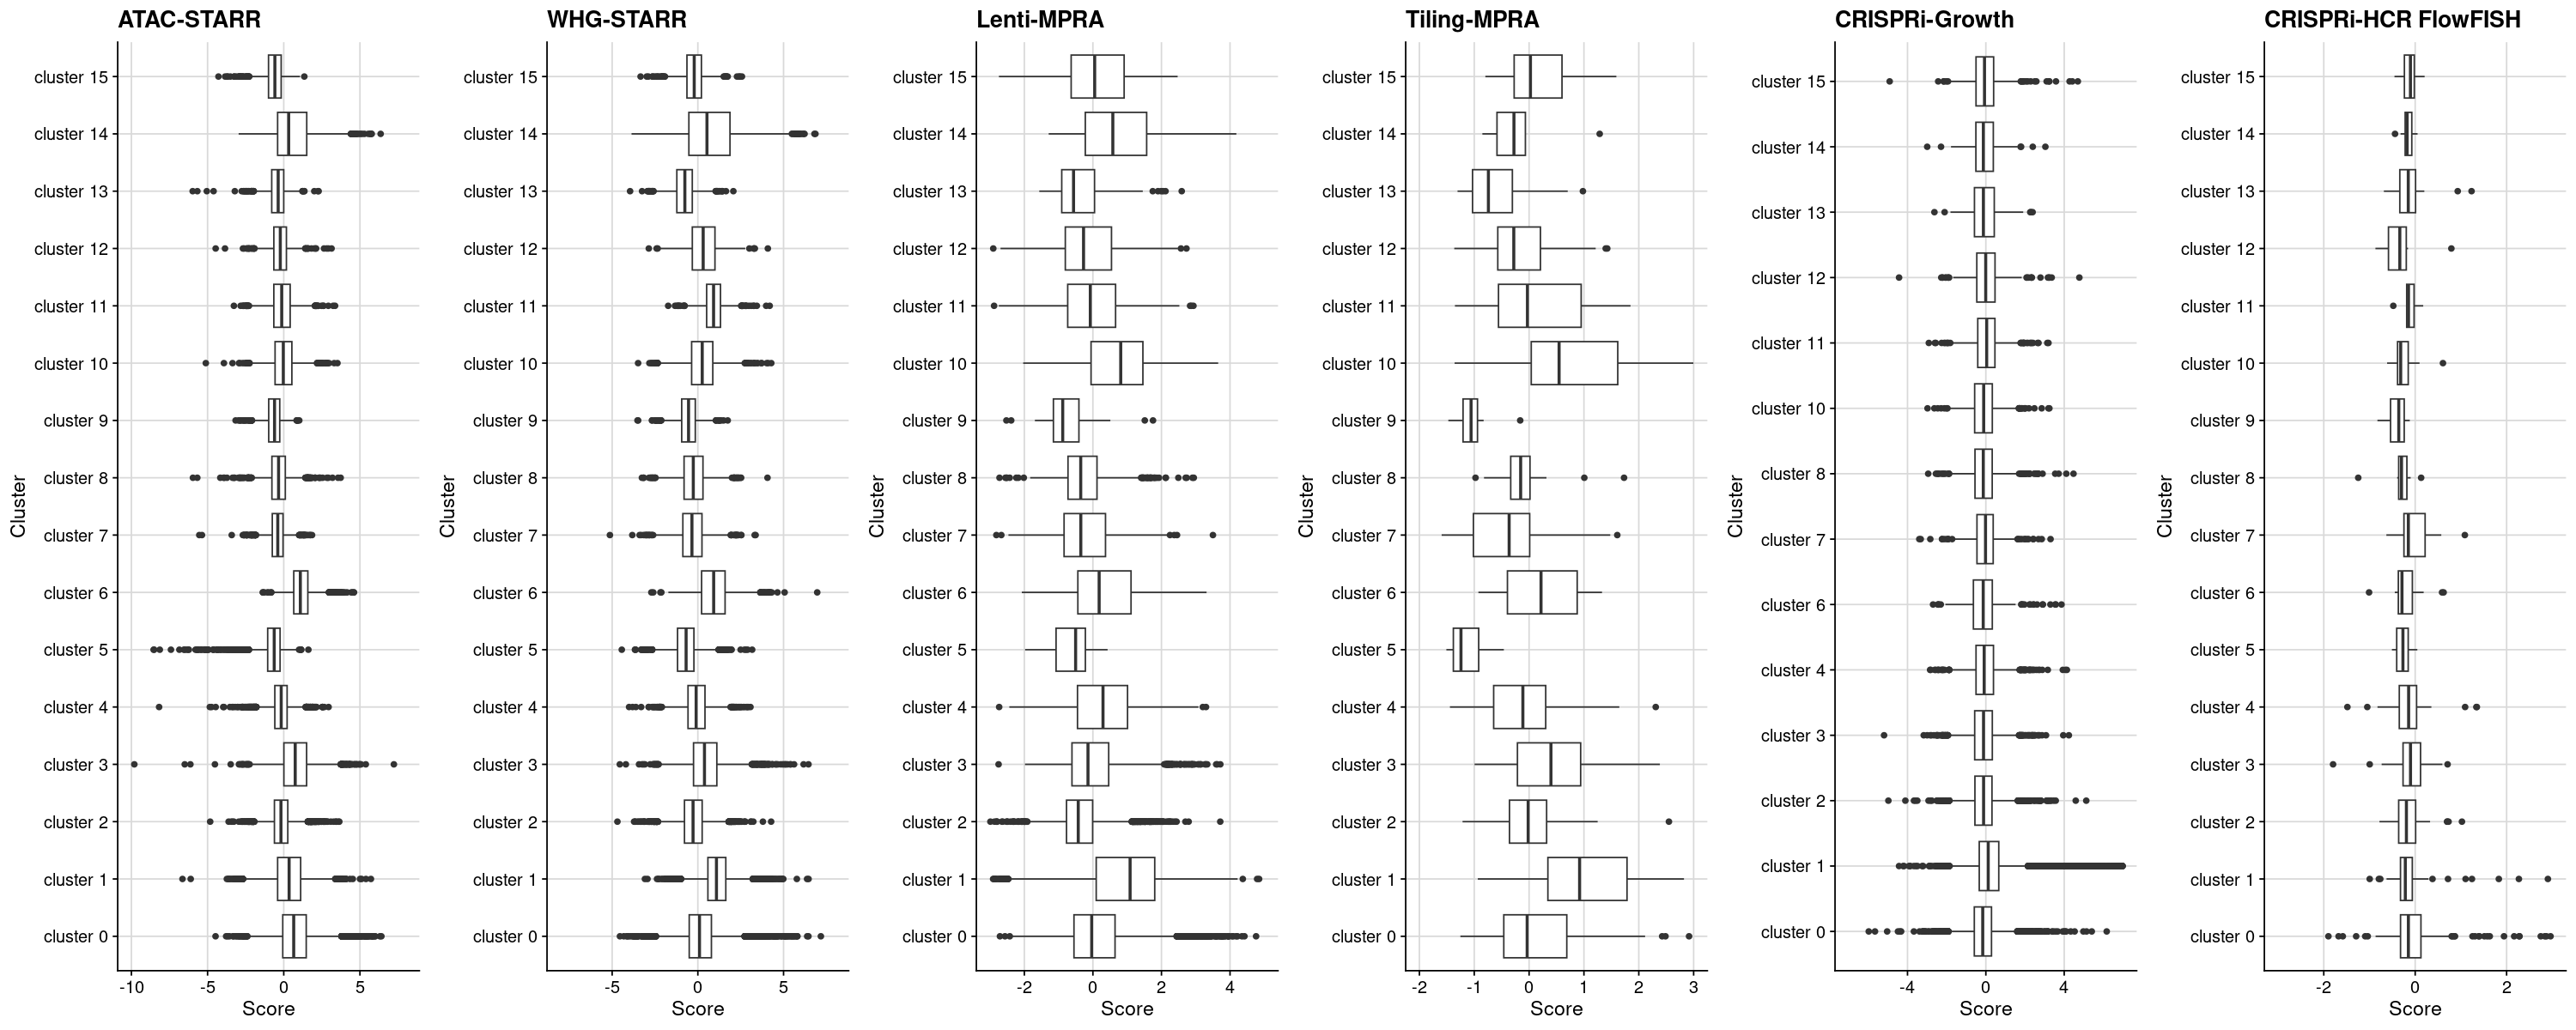

In [34]:
### options(repr.plot.height=10, repr.plot.width=25)
plot_grid(plotlist = lst_gpt, nrow=1, byrow=FALSE)

In [ ]:
lst = lst_dat_region_merge_fcc
vec = names(lst)
names(vec) = vec

lst = lapply(vec, function(idx){
    
    dat_fcc = lst[[idx]] %>% 
        dplyr::arrange(abs(Score)) %>% 
        dplyr::mutate(Region = factor(Region, levels=Region))
    dat_ref = dat_region_umap_cluster

    txt_assay = unique(dat_fcc$Assay_Label)
    num_size  = lst_params[[idx]]$size
    num_x     = lst_params[[idx]]$x
    num_y     = lst_params[[idx]]$y
    theme_color = fun_get_theme_color(num_x, num_y)
    
    gpt = ggplot() + 
        geom_point(data=dat_ref, aes(x=UMAP1, y=UMAP2), color="grey70", size=0.5,      alpha=0.7) + 
        geom_point(data=dat_fcc, aes(x=UMAP1, y=UMAP2,  color=Score),   size=num_size, alpha=0.5) + 
        labs(title = txt_assay) +
        theme_cowplot() +
        background_grid() +
        theme_color
    return(gpt)
})

lst_gpt = lst
print(names(lst))

In [88]:
fun_get_theme_color = function(x, y){
    ### setup colors
    vec_txt_color = rev(brewer.pal(10, "RdYlBu"))

    ### create color theme
    theme_color = scale_colour_gradientn(
        colours = colorRampPalette(vec_txt_color)(100), 
        limits=c(x, y), 
        oob = scales::squish)

    return(theme_color)
}

In [15]:
dat = dat_region_umap_cluster
head(dat)

Region,UMAP1,UMAP2,Cluster
<chr>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,-21.87767,-9.1761960,39
chr1:16025-16338,-12.15321,-12.8799200,20
chr1:115429-115969,-11.02704,-3.0313742,0
chr1:184091-184563,-20.69949,-0.9725588,24
chr1:186343-187136,-17.25740,-12.4815150,21
chr1:191204-191722,-21.78103,-13.9010320,5


In [98]:
lst_params = list(
    "ASTARR" = list(size=0.5, x=-7, y=7),
    "WSTARR" = list(size=0.5, x=-7, y=7),
    "LMPRA"  = list(size=0.5, x=-5, y=5),
    "TMPRA"  = list(size=1.0, x=-3, y=3),
    "CRISPRi-Growth" = list(size=0.5, x=-7, y=7),
    "CRISPRi-HCRFF"  = list(size=1.0, x=-3, y=3)
)

In [99]:
idx = "ASTARR"
lst_params[[idx]]$size

[1] 0.5

In [100]:
idx = "TMPRA"
lst_params[[idx]]$size

[1] 1

In [103]:
lst = lst_dat_region_merge_fcc
vec = names(lst)
names(vec) = vec

lst = lapply(vec, function(idx){
    
    dat_fcc = lst[[idx]] %>% 
        dplyr::arrange(abs(Score)) %>% 
        dplyr::mutate(Region = factor(Region, levels=Region))
    dat_ref = dat_region_umap_cluster

    txt_assay = unique(dat_fcc$Assay_Label)
    num_size  = lst_params[[idx]]$size
    num_x     = lst_params[[idx]]$x
    num_y     = lst_params[[idx]]$y
    theme_color = fun_get_theme_color(num_x, num_y)
    
    gpt = ggplot() + 
        geom_point(data=dat_ref, aes(x=UMAP1, y=UMAP2), color="grey70", size=0.5,      alpha=0.7) + 
        geom_point(data=dat_fcc, aes(x=UMAP1, y=UMAP2,  color=Score),   size=num_size, alpha=0.5) + 
        labs(title = txt_assay) +
        theme_cowplot() +
        background_grid() +
        theme_color
    return(gpt)
})

lst_gpt = lst
print(names(lst))

[1] "ASTARR"         "WSTARR"         "LMPRA"          "TMPRA"         
[5] "CRISPRi-Growth" "CRISPRi-HCRFF" 


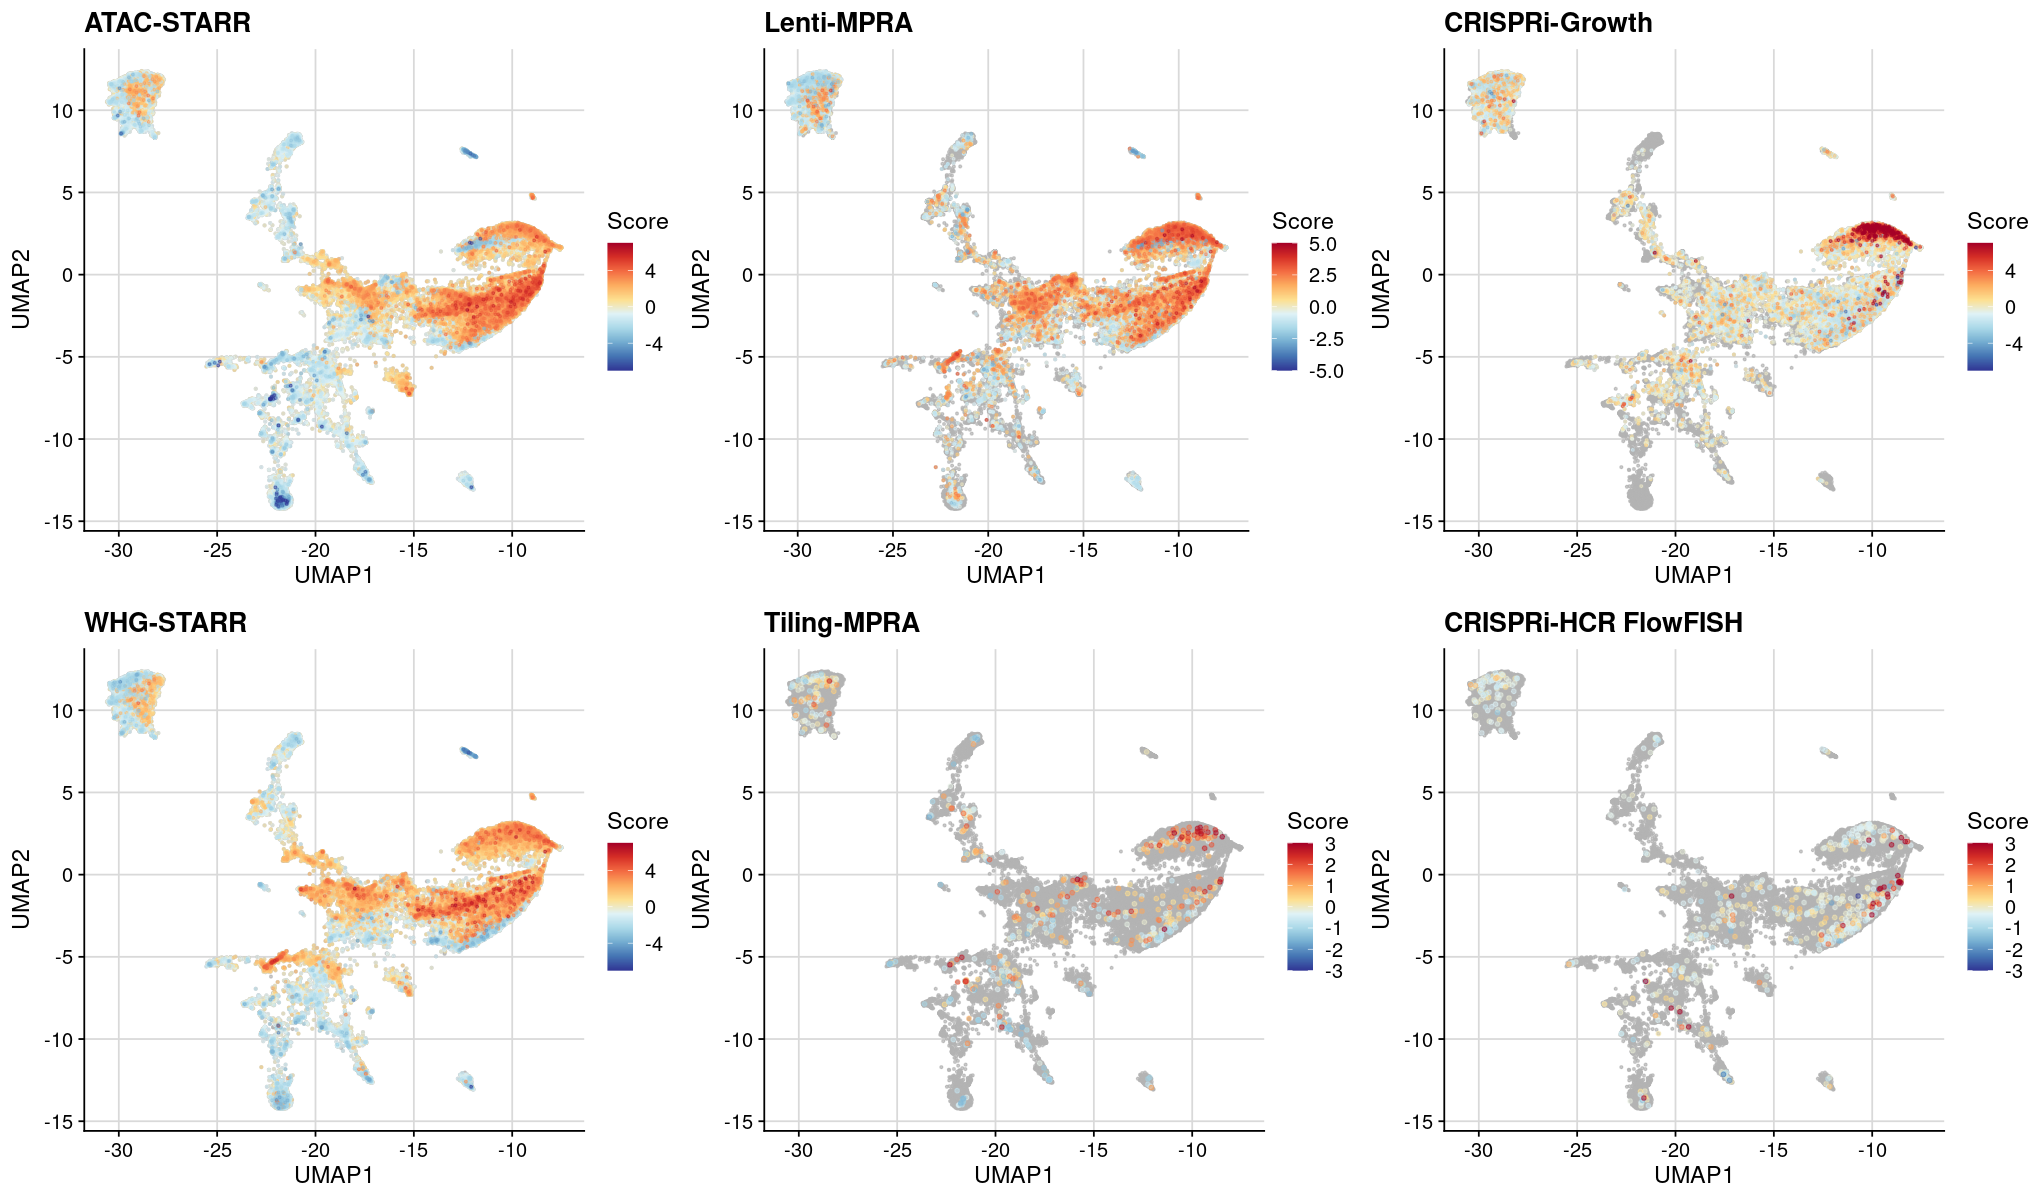

In [104]:
options(repr.plot.height=10, repr.plot.width=17)
plot_grid(plotlist = lst_gpt, nrow=2, byrow=FALSE)

## ASTARR

In [75]:
idx = "ASTARR"
lst = lst_dat_region_merge_fcc
dat = lst[[idx]]

lst = lst_gpt
gpt = lst[[idx]]

In [76]:
summary(dat$Score)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-12.49350  -0.60575  -0.03785   0.10039   0.72879   7.22856 

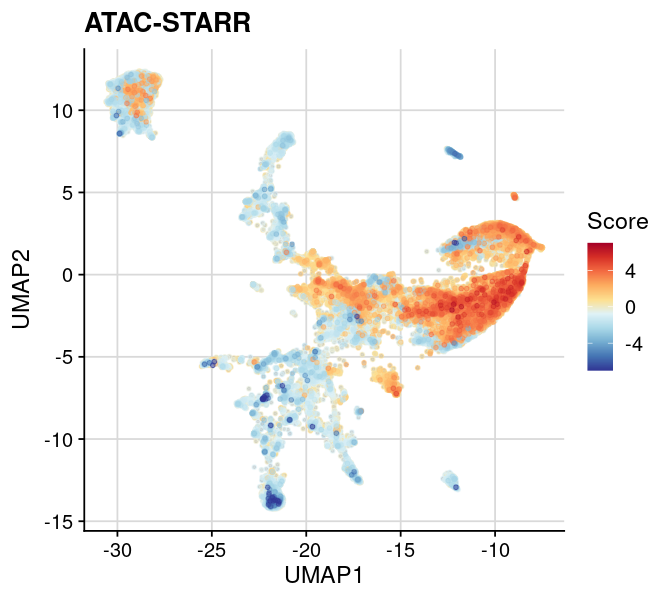

In [77]:
theme_color = fun_get_theme_color(-7, 7)
options(repr.plot.height=5, repr.plot.width=5.5)
print(gpt + theme_color)

## WSTARR

In [78]:
idx = "WSTARR"
lst = lst_dat_region_merge_fcc
dat = lst[[idx]]

lst = lst_gpt
gpt = lst[[idx]]

In [79]:
summary(dat$Score)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-7.22776 -0.59640  0.07473  0.15698  0.87123  7.17766 

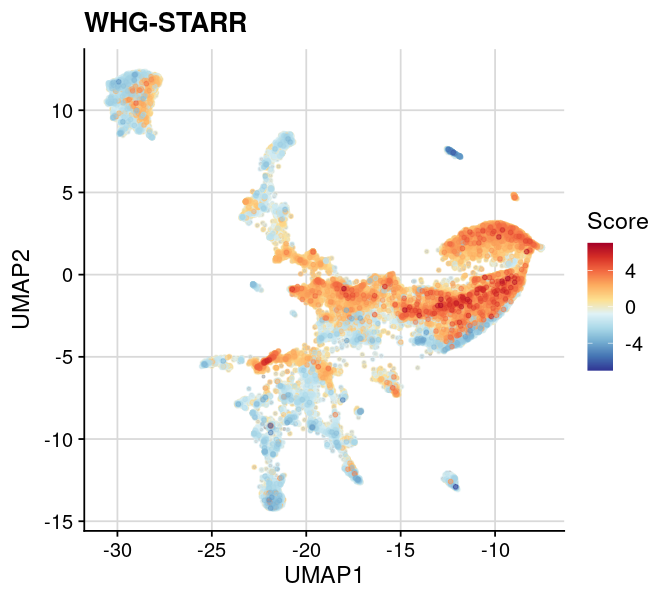

In [80]:
theme_color = fun_get_theme_color(-7, 7)
options(repr.plot.height=5, repr.plot.width=5.5)
print(gpt + theme_color)

## LMPRA

In [40]:
idx = "LMPRA"
lst = lst_dat_region_merge_fcc
dat = lst[[idx]]

lst = lst_gpt
gpt = lst[[idx]]

In [41]:
summary(dat$Score)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.306806 -0.591964  0.002955  0.193450  0.883813  5.453588 

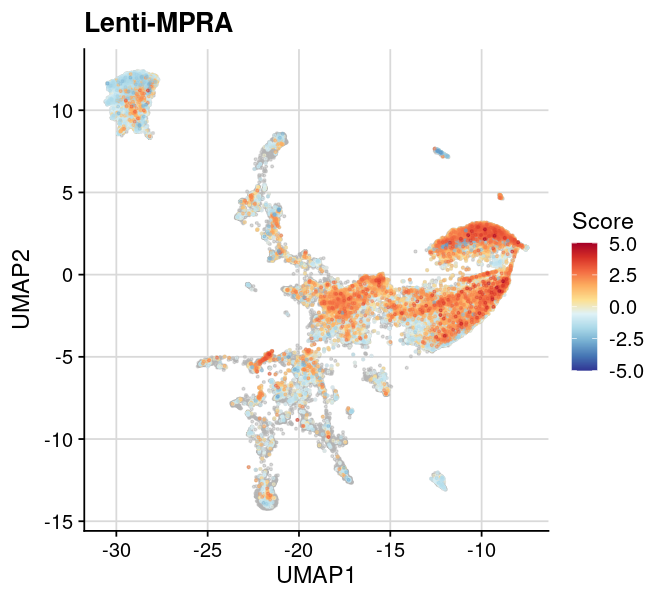

In [43]:
theme_color = fun_get_theme_color(-5, 5)
options(repr.plot.height=5, repr.plot.width=5.5)
print(gpt + theme_color)

## TMPRA

In [66]:
idx = "TMPRA"
lst = lst_dat_region_merge_fcc
dat = lst[[idx]]

lst = lst_gpt
gpt = lst[[idx]]

In [67]:
summary(dat$Score)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.66813 -0.54188 -0.02419  0.17091  0.77643  3.47434 

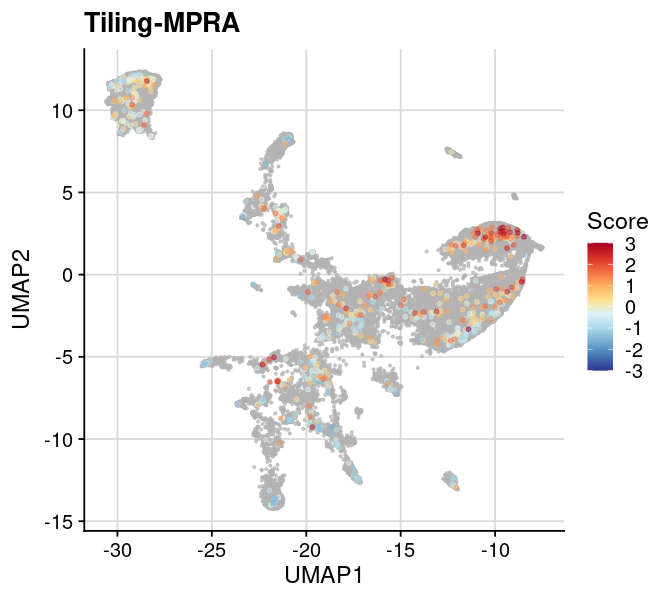

In [68]:
theme_color = fun_get_theme_color(-3, 3)
options(repr.plot.height=5, repr.plot.width=5.5)
print(gpt + theme_color)

## CRISPRi-Growth

In [89]:
idx = "CRISPRi-Growth"
lst = lst_dat_region_merge_fcc
dat = lst[[idx]]

lst = lst_gpt
gpt = lst[[idx]]

In [90]:
summary(dat$Score)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-12.87288  -0.51021  -0.06178   0.02777   0.40898  22.03649 

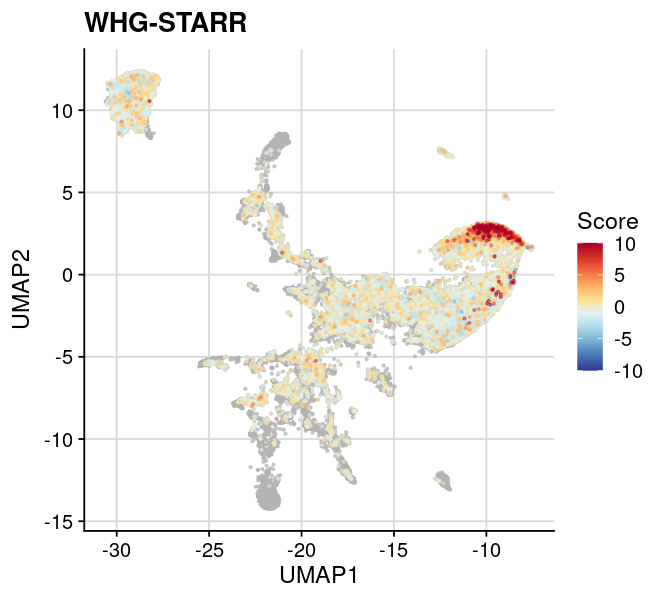

In [93]:
theme_color = fun_get_theme_color(-10, 10)
options(repr.plot.height=5, repr.plot.width=5.5)
print(gpt + theme_color)

## CRISPRi-Growth

In [94]:
idx = "CRISPRi-HCRFF"
lst = lst_dat_region_merge_fcc
dat = lst[[idx]]

lst = lst_gpt
gpt = lst[[idx]]

In [95]:
summary(dat$Score)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.85698 -0.33901 -0.16270  0.02785  0.05081 12.81271 

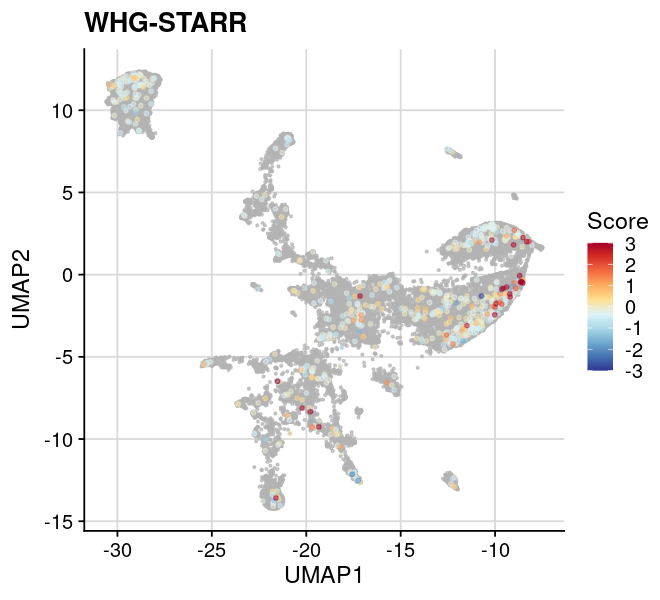

In [97]:
theme_color = fun_get_theme_color(-3, 3)
options(repr.plot.height=5, repr.plot.width=5.5)
print(gpt + theme_color)

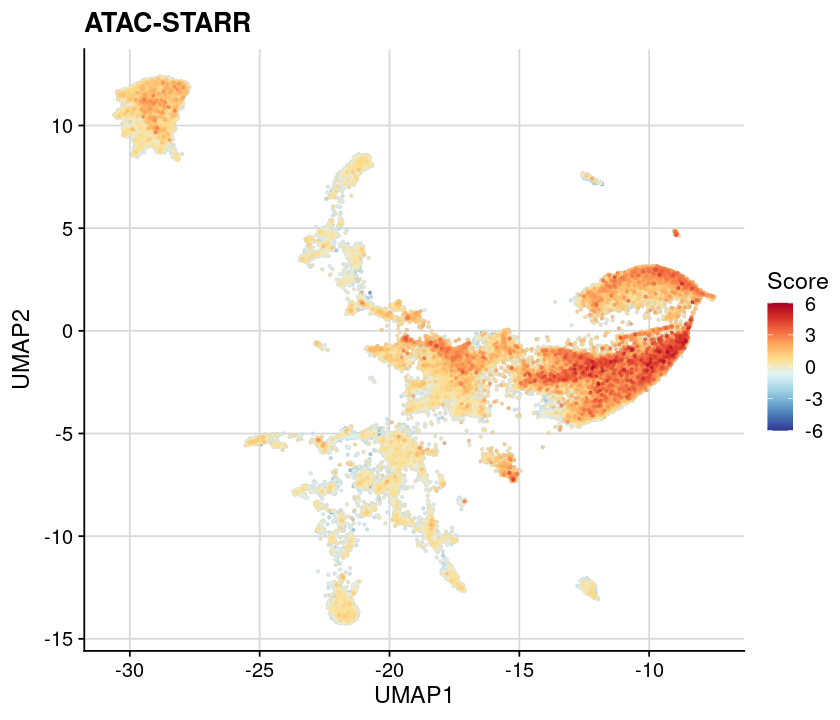

In [18]:
vec_txt_color = colorRampPalette(rev(brewer.pal(10, "RdYlBu")))
theme_color   = scale_colour_gradientn(
    colours = vec_txt_color(100), 
    limits=c(-6, 6), 
    oob = scales::squish)

gpt = lst[[1]] + theme_color
print(gpt)

In [49]:
dat = lst$`ASTARR`
dat = dat %>% 
    dplyr::arrange(Score) %>% 
    dplyr::mutate(Region = factor(Region, levels=Region))
summary(dat$Score)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-12.49350  -0.60575  -0.03785   0.10039   0.72879   7.22856 

In [50]:
vec_txt_color =  colorRampPalette(rev(brewer.pal(10, "RdYlBu")))
theme_color   = scale_colour_gradientn(
    colours = vec_txt_color(100), 
    limits=c(-6, 6), 
    oob = scales::squish)

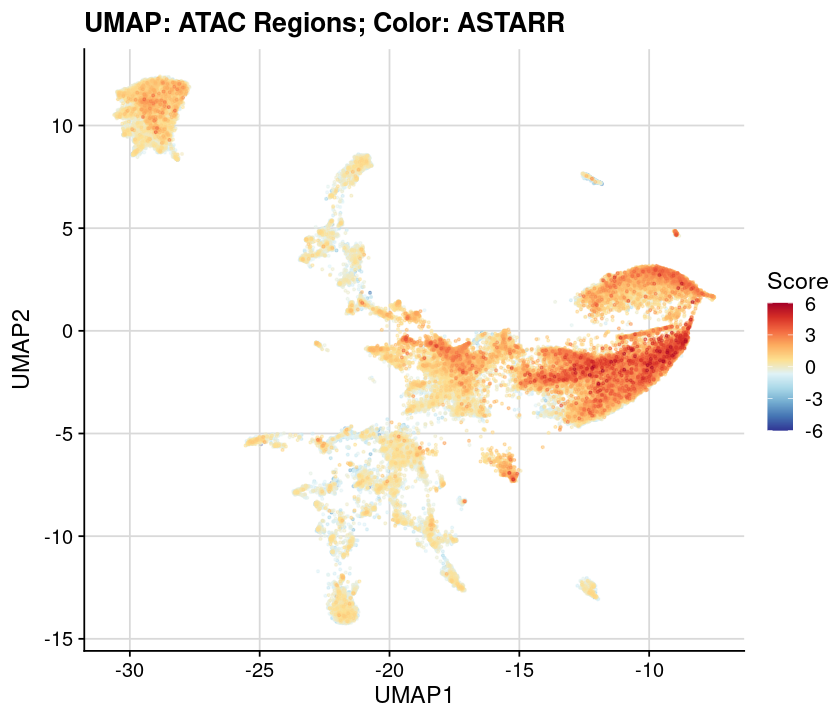

In [51]:
txt = "UMAP: ATAC Regions; Color: ASTARR"
gpt = ggplot() + 
    geom_point(data=dat, aes(x=UMAP1, y=UMAP2, color=Score), size=0.5, alpha=0.5) + 
    labs(title = txt) +
    theme_cowplot() +
    background_grid() +
    theme_color

options(repr.plot.height=6, repr.plot.width=7)
print(gpt)

In [52]:
dat = lst$`WSTARR`
dat = dat %>% 
    dplyr::arrange(Score) %>% 
    dplyr::mutate(Region = factor(Region, levels=Region))
summary(dat$Score)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-7.22776 -0.59640  0.07473  0.15698  0.87123  7.17766 

In [53]:
vec_txt_color =  colorRampPalette(rev(brewer.pal(10, "RdYlBu")))
theme_color   = scale_colour_gradientn(
        colours = vec_txt_color(100), 
        limits=c(-6, 6), 
        oob = scales::squish)

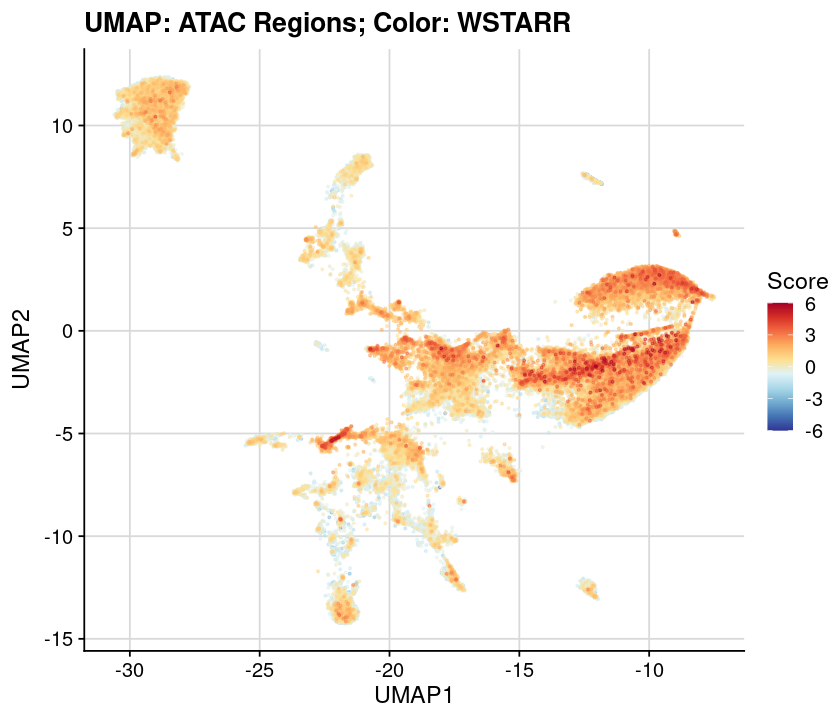

In [54]:
txt = "UMAP: ATAC Regions; Color: WSTARR"
gpt = ggplot() + 
    geom_point(data=dat, aes(x=UMAP1, y=UMAP2, color=Score), size=0.5, alpha=0.5) + 
    labs(title = txt) +
    theme_cowplot() +
    background_grid() +
    theme_color

options(repr.plot.height=6, repr.plot.width=7)
print(gpt)

In [70]:
dat = lst$`LMPRA`
dat = dat %>% 
    dplyr::arrange(Score) %>% 
    dplyr::mutate(Region = factor(Region, levels=Region))
summary(dat$Score)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.306806 -0.591964  0.002955  0.193450  0.883813  5.453588 

In [73]:
vec_txt_color =  colorRampPalette(rev(brewer.pal(10, "RdYlBu")))
theme_color   = scale_colour_gradientn(
        colours = vec_txt_color(100), 
        limits=c(-6, 6), 
        oob = scales::squish)

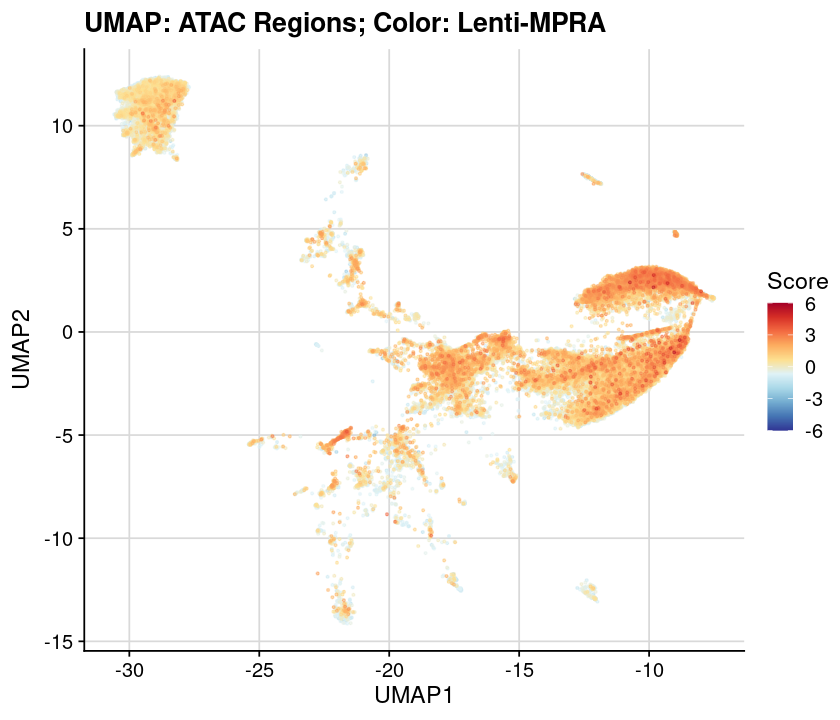

In [75]:
txt = "UMAP: ATAC Regions; Color: Lenti-MPRA"
gpt = ggplot() + 
    geom_point(data=dat, aes(x=UMAP1, y=UMAP2, color=Score), size=0.5, alpha=0.5) + 
    labs(title = txt) +
    theme_cowplot() +
    background_grid() +
    theme_color

options(repr.plot.height=6, repr.plot.width=7)
print(gpt)

In [77]:
dat = lst$`TMPRA`
dat = dat %>% 
    dplyr::arrange(Score) %>% 
    dplyr::mutate(Region = factor(Region, levels=Region))
summary(dat$Score)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.66813 -0.54188 -0.02419  0.17091  0.77643  3.47434 

In [78]:
vec_txt_color =  colorRampPalette(rev(brewer.pal(10, "RdYlBu")))
theme_color   = scale_colour_gradientn(
        colours = vec_txt_color(100), 
        limits=c(-4, 4), 
        oob = scales::squish)

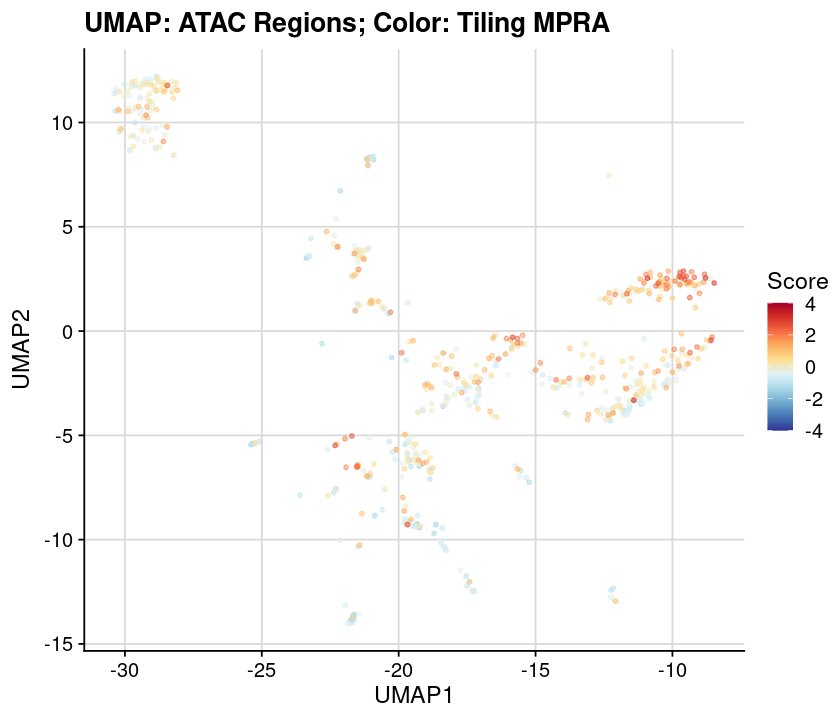

In [79]:
txt = "UMAP: ATAC Regions; Color: Tiling MPRA"
gpt = ggplot() + 
    geom_point(data=dat, aes(x=UMAP1, y=UMAP2, color=Score), size=1, alpha=0.5) + 
    labs(title = txt) +
    theme_cowplot() +
    background_grid() +
    theme_color

options(repr.plot.height=6, repr.plot.width=7)
print(gpt)

In [44]:
dat = lst$`CRISPRi-Growth`
dat = dat %>% 
    dplyr::arrange(Score) %>% 
    dplyr::mutate(Region = factor(Region, levels=Region))
summary(dat$Score)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-12.87288  -0.51021  -0.06178   0.02777   0.40898  22.03649 

In [47]:
vec_txt_color =  colorRampPalette(rev(brewer.pal(10, "RdYlBu")))
theme_color   = scale_colour_gradientn(
        colours = vec_txt_color(100), 
        limits=c(-5, 5), 
        oob = scales::squish)

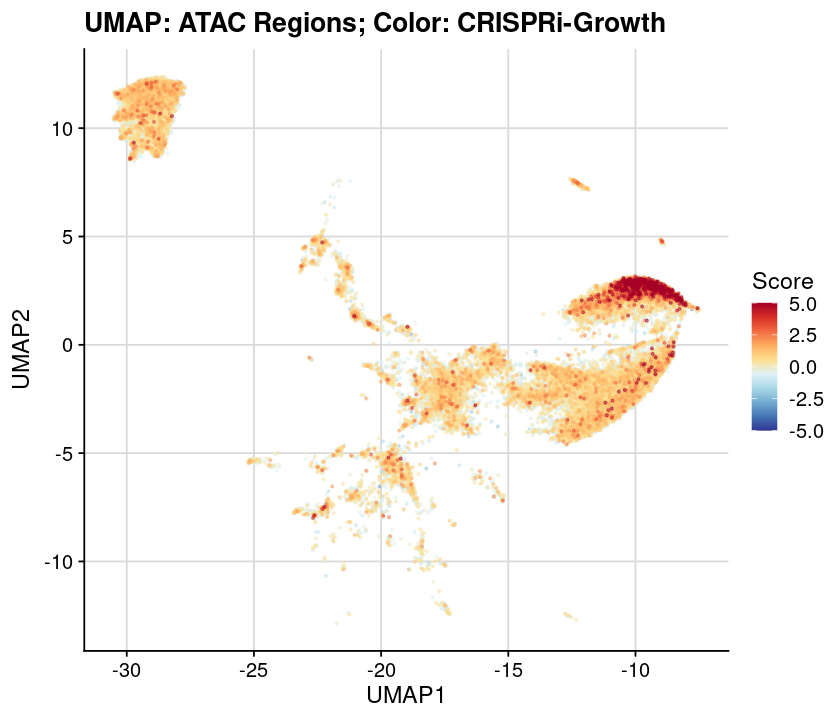

In [48]:
txt = "UMAP: ATAC Regions; Color: CRISPRi-Growth"
gpt = ggplot() + 
    geom_point(data=dat, aes(x=UMAP1, y=UMAP2, color=Score), size=0.5, alpha=0.5) + 
    labs(title = txt) +
    theme_cowplot() +
    background_grid() +
    theme_color

options(repr.plot.height=6, repr.plot.width=7)
print(gpt)

In [58]:
dat = lst$`CRISPRi-HCRFF`
dat = dat %>% 
    dplyr::arrange(Score) %>% 
    dplyr::mutate(Region = factor(Region, levels=Region))
summary(dat$Score)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.85698 -0.33901 -0.16270  0.02785  0.05081 12.81271 

In [59]:
vec_txt_color =  colorRampPalette(rev(brewer.pal(10, "RdYlBu")))
theme_color   = scale_colour_gradientn(
        colours = vec_txt_color(100), 
        limits=c(-2, 2), 
        oob = scales::squish)

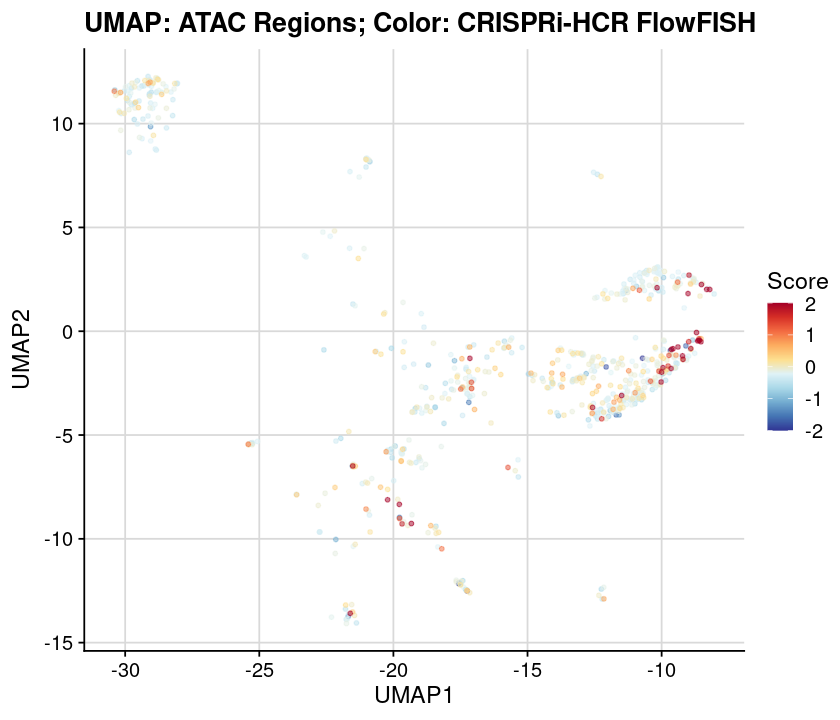

In [62]:
txt = "UMAP: ATAC Regions; Color: CRISPRi-HCR FlowFISH"
gpt = ggplot() + 
    geom_point(data=dat, aes(x=UMAP1, y=UMAP2, color=Score), size=1, alpha=0.5) + 
    labs(title = txt) +
    theme_cowplot() +
    background_grid() +
    theme_color

options(repr.plot.height=6, repr.plot.width=7)
print(gpt)

In [ ]:
vec_txt_assay = c(
    "ASTARR", "WSTARR", 
    "LMPRA", "TMPRA", 
    "CRISPRi-Growth", "CRISPi-HCRFF")
